### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Seaborn tend to have different warnings
import warnings
warnings.filterwarnings("ignore")  


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


import math

import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

# 1) Importing Data and understanding it

In [2]:
# Importing the data
bbdata = pd.read_csv("day.csv")
bbdata.shape

(730, 16)

In [3]:
bbdata.head(730)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Getting the info on data
bbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


By looking at the info it is clear that there are no missing values in the data

# 2) Data Cleaning

In [5]:
# Taking new name for dataframe to perform cleaning
bbdata_dc = bbdata

In [6]:
# Knowing the columns
bbdata_dc.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

***Columns decided to remove:***
- instant : Since it is just a serial number column.
- casual , registered : Since the sum of these 2 columns is represented by 'cnt'.
- atemp : 'temp' and 'atemp' are alike and since 'atemp' is the real feel it with humidity and windspeed and they are already present in data, so it is better to consider temp.

In [7]:
# Getting columns to remove
dcol=['instant','casual','registered','atemp']

In [8]:
# Removing the columns
bbdata_dc.drop(dcol, axis=1, inplace=True)
bbdata_dc.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [9]:
bbdata_dc.shape

(730, 12)

The columns ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'] are actually categorical but are represented in numericals.<br>

These columns need to be converted to a valid categorical varibles to interprit the data in a best way


<br>



## 2.1) Converting the columns to a valid categorical varibles

### a) Converting the column 'season'

From dictionary we know season : season (1:spring, 2:summer, 3:fall, 4:winter)<br>
<br>
Now converting:
- 1 to spring<br>
- 2 to summer<br>
- 3 to fall<br>
- 4 to winter<br>

In [10]:
# Converting the values
bbdata_dc['season'] = bbdata_dc['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# verifying the above substitution
bbdata_dc['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

### b) Converting the column 'mnth'

In [11]:
# Knowing the data of column 'mnth'
bbdata_dc['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

conversion:
- 1 - jan<br>
- 2 - feb<br>
- 3 - mar<br>
- 4 - apr<br>
- 5 - may<br>
- 6 - jun<br>
- 7 - jul<br>
- 8 - aug<br>
- 9 - sep<br>
- 10 - oct<br>
- 11 - nov<br>
- 12 - dec<br>

In [12]:
# Converting the values
bbdata_dc['mnth'] = bbdata_dc['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun',
                                     7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

# verifying the above substitution
bbdata_dc['mnth'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

### c) Converting the column 'weekday'

***Error on observations*** <br>
 At the time of import it is noticed that for the date '01-01-2018' weekday is '6' which happens to be monday.<br>
 And also '29-12-2019' weekday is also '6' but that happens to be sunday.

so there is miss interpretation in the data of varible 'weekday'.

***Knowing where the descripency happend***

In [13]:
# Since there are a total of 730 rows
# binnig the rows = 730/7 = 104.2857142857143.However the error should happen before last row, 105 can be considered.

p=0
q=7
c=0
for i in range(1,106):
    k=0
    for j in range(p,q):
        t = bbdata_dc['weekday'][j]
        k=t+k
        c = 1+c
        if c == 730:
            break
    p = p+7
    q = q+7
# The sum for the 7 days should be 21(0+1+2+3+4+5+6), incase if it's not 21 stopping the loop
    if k != 21:
        a= i*7 - 6
        print('Discrepency is in row ranging from', a, 'to', c)
        print('The sum is', k, 'instead of', 21)
        break

Discrepency is in row ranging from 421 to 427
The sum is 24 instead of 21


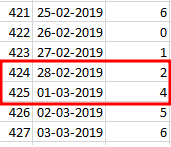

Clearly from image it is noticed that at row 425 it is entered as **'4'** instead of **'3'**.

Hence we try to get the days from the 'dteday' column.

In [14]:
# Converting the 'date' type to datetime
bbdata_dc['dteday'] = pd.to_datetime(bbdata_dc['dteday'], format = "%d-%m-%Y")
# To verify
bbdata_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 68.6+ KB


In [15]:
# Getting the Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
# This is done to verify if there is any error in the 'date' column
bbdata_dc['daytmp'] = bbdata_dc['dteday'].apply(lambda x : x.strftime("%w"))
bbdata_dc['daytmp'].value_counts()

2    105
1    105
6    104
4    104
3    104
0    104
5    104
Name: daytmp, dtype: int64

In [16]:
bbdata_dc.head(730)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,daytmp
0,2018-01-01,spring,0,jan,0,6,0,2,14.110847,80.5833,10.749882,985,1
1,2018-01-02,spring,0,jan,0,0,0,2,14.902598,69.6087,16.652113,801,2
2,2018-01-03,spring,0,jan,0,1,1,1,8.050924,43.7273,16.636703,1349,3
3,2018-01-04,spring,0,jan,0,2,1,1,8.200000,59.0435,10.739832,1562,4
4,2018-01-05,spring,0,jan,0,3,1,1,9.305237,43.6957,12.522300,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,dec,0,4,1,2,10.420847,65.2917,23.458911,2114,5
726,2019-12-28,spring,1,dec,0,5,1,2,10.386653,59.0000,10.416557,3095,6
727,2019-12-29,spring,1,dec,0,6,0,2,10.386653,75.2917,8.333661,1341,0
728,2019-12-30,spring,1,dec,0,0,0,1,10.489153,48.3333,23.500518,1796,1


In [17]:
# Verifying the days using the previous method
p=0
q=7
c=0
for i in range(1,106):
    k=0
    for j in range(p,q):
        t = bbdata_dc['daytmp'][j]
        k = int(t) + int(k)
        c = 1+c
        if c == 730:
            break      
    p = p+7
    q = q+7
# The sum for the 7 days should be 21(0+1+2+3+4+5+6), incase if it's not 21 stopping the loop
    if k != 21:
        a= i*7 - 6
        print('Discrepency is in row ranging from', a, 'to', c)
        print('The sum is', k, 'instead of', 21)
        break    

Discrepency is in row ranging from 729 to 730
The sum is 3 instead of 21


The sum is correct since the last 2 rows(729,730) are 1+2 = 3

In [18]:
# Getting the Weekday in short version
bbdata_dc['day'] = bbdata_dc['dteday'].apply(lambda x : x.strftime("%a"))
bbdata.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,daytmp,day
0,2018-01-01,spring,0,jan,0,6,0,2,14.110847,80.5833,10.749882,985,1,Mon
1,2018-01-02,spring,0,jan,0,0,0,2,14.902598,69.6087,16.652113,801,2,Tue
2,2018-01-03,spring,0,jan,0,1,1,1,8.050924,43.7273,16.636703,1349,3,Wed
3,2018-01-04,spring,0,jan,0,2,1,1,8.200000,59.0435,10.739832,1562,4,Thu
4,2018-01-05,spring,0,jan,0,3,1,1,9.305237,43.6957,12.522300,1600,5,Fri


***Columns decided to remove:***
- dteday : The year is covered in 'yr', month is covered in 'mnth' and day is mentioned in 'weekday', So dteday can be ignored since converting it to dummy variable results in same columns provided.
- weekday : Since this column has error.
- daytmp : It created only for verification, So it can be removed.


In [19]:
dcol=['dteday','weekday','daytmp']
bbdata_dc.drop(dcol, axis=1, inplace=True)
bbdata_dc.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,jan,0,0,2,14.110847,80.5833,10.749882,985,Mon
1,spring,0,jan,0,0,2,14.902598,69.6087,16.652113,801,Tue
2,spring,0,jan,0,1,1,8.050924,43.7273,16.636703,1349,Wed
3,spring,0,jan,0,1,1,8.200000,59.0435,10.739832,1562,Thu
4,spring,0,jan,0,1,1,9.305237,43.6957,12.522300,1600,Fri


In [20]:
# Verifying the 'yr' column
bbdata_dc['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

### d) Converting the column 'weathersit'

From dictionary we know<br>
weathersit : 

        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<br>
Now converting:<br>
- 1 to clear<br>
- 2 to cloudy<br>
- 3 to lightrain<br>
- 4 to heavyrain<br>

In [21]:
# Converting the values
bbdata_dc['weathersit'] = bbdata_dc['weathersit'].map({1:'clear', 2:'cloudy', 3:'lightrain', 4:'heavyrain'})

# verifying the above substitution
bbdata_dc['weathersit'].unique()

array(['cloudy', 'clear', 'lightrain'], dtype=object)

In [22]:
bbdata_dc.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,jan,0,0,cloudy,14.110847,80.5833,10.749882,985,Mon
1,spring,0,jan,0,0,cloudy,14.902598,69.6087,16.652113,801,Tue
2,spring,0,jan,0,1,clear,8.050924,43.7273,16.636703,1349,Wed
3,spring,0,jan,0,1,clear,8.200000,59.0435,10.739832,1562,Thu
4,spring,0,jan,0,1,clear,9.305237,43.6957,12.522300,1600,Fri


# 3) Data visualization

**Visualizing the numerical data**
- Note: 'yr', 'holiday' and 'workingday' are categorical but represented with numericals
 <br>
 <br>
 

***Categorical columns representation(from dictionary)***:<br>
- yr : year (0: 2018, 1: 2019)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

***Our target variable is 'cnt'***

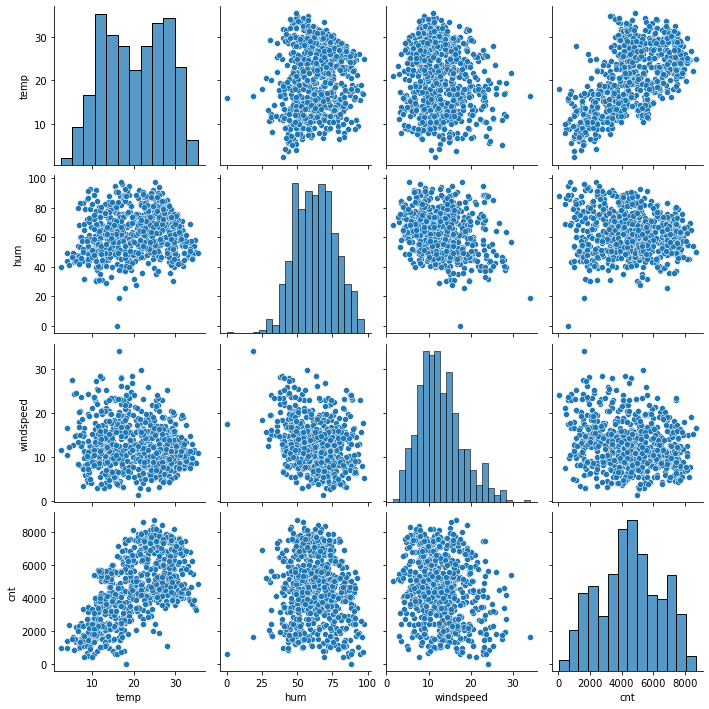

In [23]:
sns.pairplot(bbdata_dc[['temp','hum','windspeed','cnt']])
plt.show()

There is fair correlation between cnt and temp, hum, windspeed

**Visualizing the categorical data**

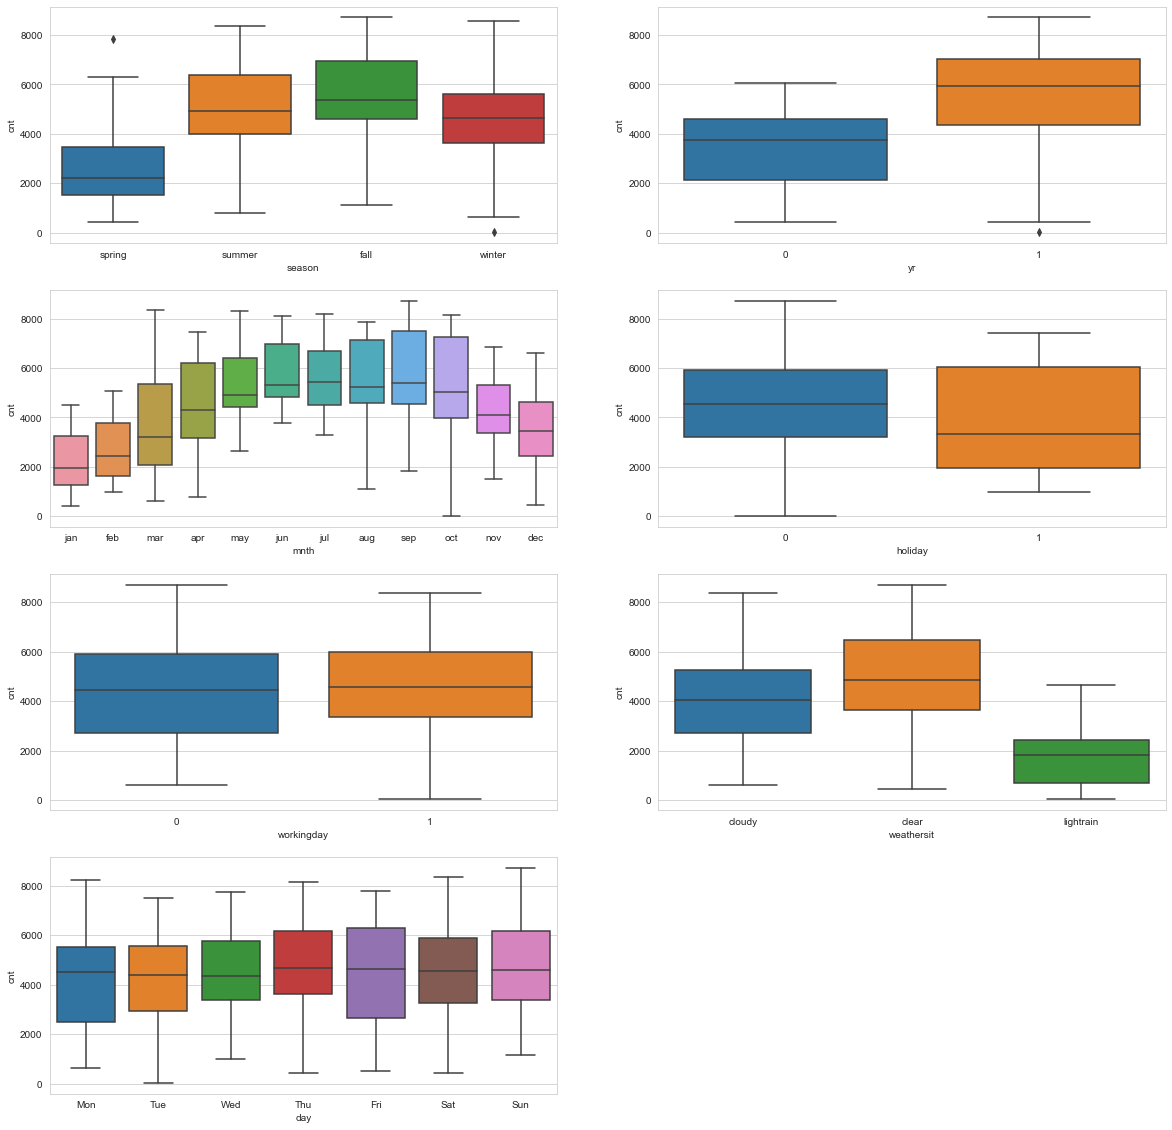

In [24]:
plt.figure(figsize = (20,20))
sns.set_style(style="whitegrid")
plt.subplot(4,2,1)
sns.boxplot(y='cnt',x='season',data=bbdata_dc)
plt.subplot(4,2,2)
sns.boxplot(y='cnt',x='yr',data=bbdata_dc)
plt.subplot(4,2,3)
sns.boxplot(y='cnt',x='mnth',data=bbdata_dc)
plt.subplot(4,2,4)
sns.boxplot(y='cnt',x='holiday',data=bbdata_dc)
plt.subplot(4,2,5)
sns.boxplot(y='cnt',x='workingday',data=bbdata_dc)
plt.subplot(4,2,6)
sns.boxplot(y='cnt',x='weathersit',data=bbdata_dc)
plt.subplot(4,2,7)
sns.boxplot(y='cnt',x='day',data=bbdata_dc)
plt.show()

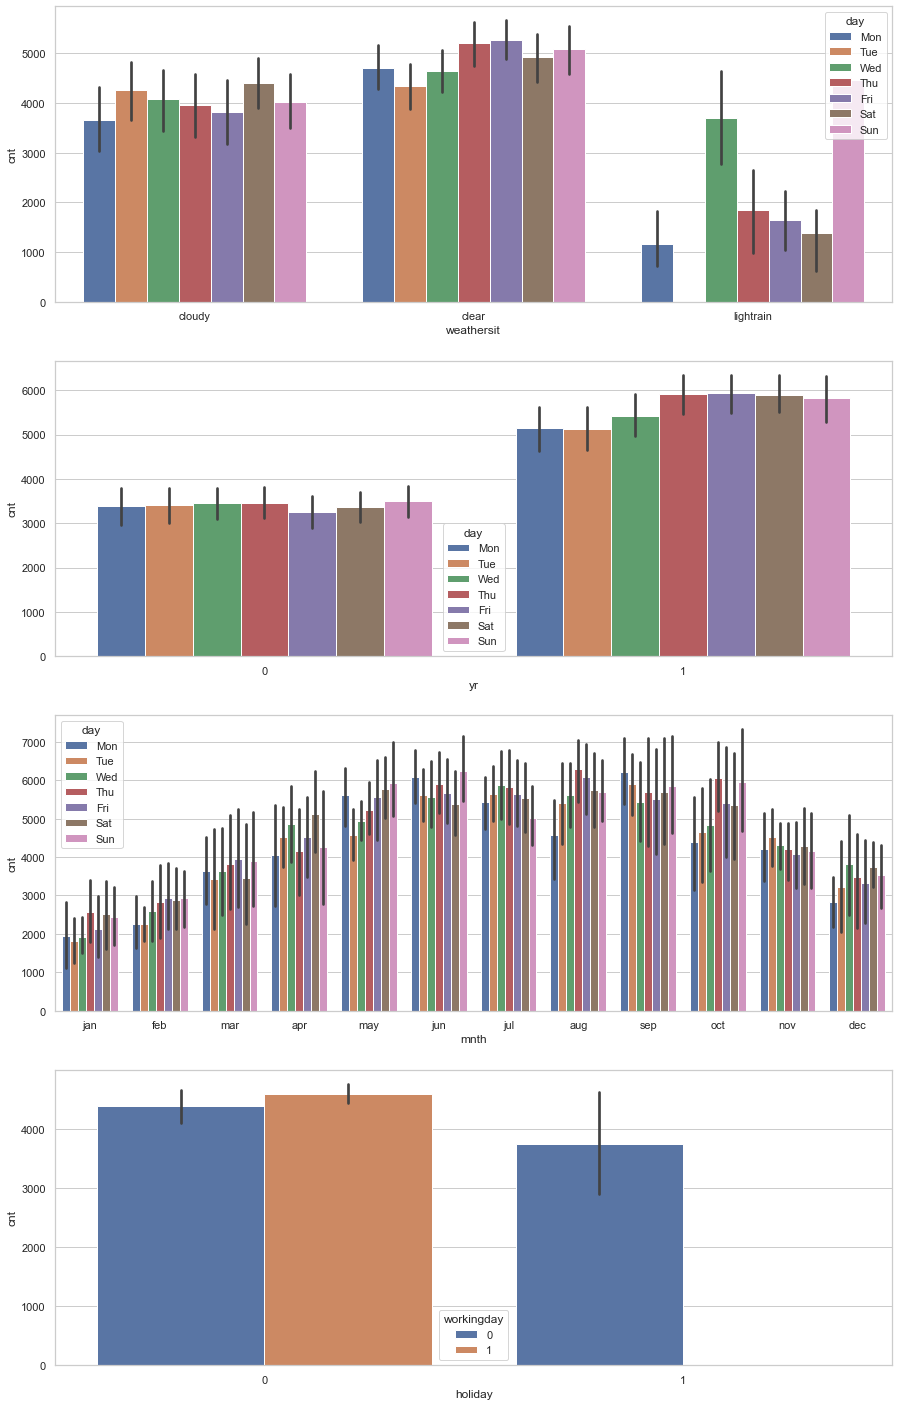

In [25]:
plt.figure(figsize = (15,25))
sns.set_theme(style="whitegrid")
plt.subplot(4,1,1)
sns.barplot(y='cnt',x='weathersit',hue ='day' ,data=bbdata_dc)
plt.subplot(4,1,2)
sns.barplot(y='cnt',x='yr',hue ='day' ,data=bbdata_dc)
plt.subplot(4,1,3)
sns.barplot(y='cnt',x='mnth',hue ='day' ,data=bbdata_dc)
plt.subplot(4,1,4)
sns.barplot(y='cnt',x='holiday',hue ='workingday' ,data=bbdata_dc)
plt.show()

# 3) Data preparation

## 3.1) Dummy variables creation

In [26]:
# Getting the dummy variables for all the columns
status = pd.get_dummies(bbdata_dc, columns = ['season','mnth','weathersit','day'], drop_first=True)
pd.set_option('display.max_columns', None)
status.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_cloudy,weathersit_lightrain,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Removing variables except dummy variables
status.drop(['yr','holiday','workingday','temp','hum','windspeed','cnt'],axis=1,inplace=True)
status.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_cloudy,weathersit_lightrain,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Combining the status dataframe
bbdata_dc = pd.concat([bbdata_dc,status], axis=1)
bbdata_dc.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_cloudy,weathersit_lightrain,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,spring,0,jan,0,0,cloudy,14.110847,80.5833,10.749882,985,Mon,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,spring,0,jan,0,0,cloudy,14.902598,69.6087,16.652113,801,Tue,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,0,jan,0,1,clear,8.050924,43.7273,16.636703,1349,Wed,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,1,clear,8.200000,59.0435,10.739832,1562,Thu,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,1,clear,9.305237,43.6957,12.522300,1600,Fri,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Removing categorical variables(for which dummies are created)
bbdata_dc.drop(['season','mnth','weathersit','day'],axis=1,inplace=True)
bbdata_dc.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_cloudy,weathersit_lightrain,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.2) Splitting the data to test and train

In [30]:
# Taking new name for dataframe to perform test and train
bbdtt = bbdata_dc

In [31]:
# To make sure same pattern to be repeated everytime
np.random.seed(0)
bbdtt_train, bbdtt_test = train_test_split(bbdtt, train_size = 0.7, test_size = 0.3, random_state=100)

## 3.3) Scaling the data

We use min_max scaling

In [32]:
# Getting minmax scalarfrom sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Taking a list of all the numerical variables except the one's having 0's and 1's in column
scol = ['temp','hum','windspeed','cnt']

bbdtt_train[scol] = scaler.fit_transform(bbdtt_train[scol])

bbdtt_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_cloudy,weathersit_lightrain,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


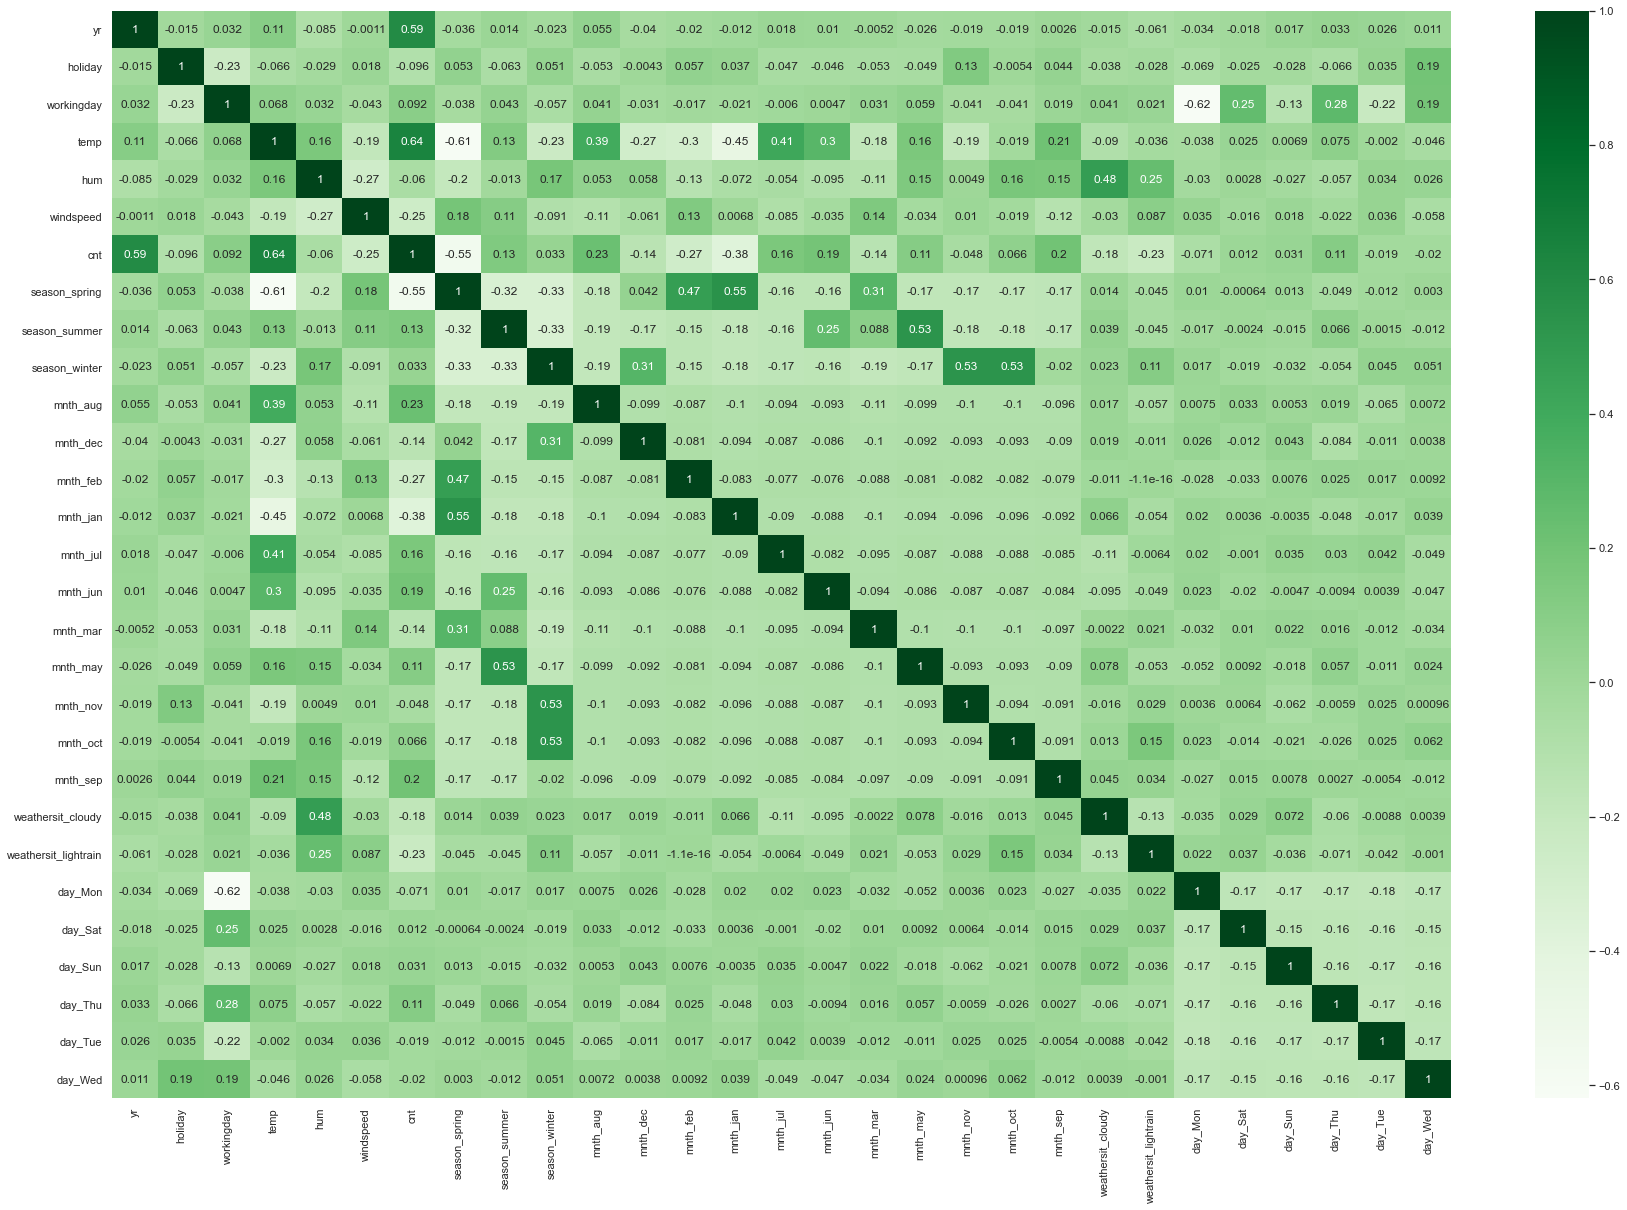

In [34]:
# Plotting heatmap of correlations for an intuition
plt.figure(figsize = (30, 20))
sns.heatmap(bbdtt_train.corr(), annot = True, cmap="Greens")
plt.show()

## 3.4) Splitting data to x and y trains

In [35]:
y_train = bbdtt_train.pop('cnt')
X_train = bbdtt_train

# 

In [36]:
len(X_train.columns)

28

# 

# MODEL - I

# 4) Building model

Since there are 28 varibles, We use RFE to cut down the variables to 15.

## Building model using sciKit learn to perform RFE

In [37]:
# Getting lm
lm = LinearRegression()

# Fitting the linear model
lm.fit(X_train, y_train)

# Running RFE to drop 13 variables 
rfe = RFE(lm,15)

# Fitting the RFE model
rfe = rfe.fit(X_train, y_train)

In [38]:
# Knowing the rfe support and rank
drfe = {'X_train':X_train.columns,'RFE_decision':rfe.support_,'Rank_rfe':rfe.ranking_}
dfrfe = pd.DataFrame(data=drfe)
dfrfe.sort_values(by=['Rank_rfe'], ascending=False)

,X_train,RFE_decision,Rank_rfe
14,mnth_jun,False,14
15,mnth_mar,False,13
2,workingday,False,12
23,day_Sat,False,11
25,day_Thu,False,10
18,mnth_oct,False,9
24,day_Sun,False,8
27,day_Wed,False,7
9,mnth_aug,False,6
16,mnth_may,False,5


In [39]:
# 15 columns obtained by performing RFE
Lrfe_support = list(dfrfe[dfrfe.RFE_decision == True]['X_train'])
Lrfe_support

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_dec',
 'mnth_jan',
 'mnth_jul',
 'mnth_nov',
 'mnth_sep',
 'weathersit_cloudy',
 'weathersit_lightrain']

In [40]:
# Columns removed by performing RFE
Lrfe_reject = list(dfrfe[dfrfe.RFE_decision == False]['X_train'])
Lrfe_reject

['workingday',
 'mnth_aug',
 'mnth_feb',
 'mnth_jun',
 'mnth_mar',
 'mnth_may',
 'mnth_oct',
 'day_Mon',
 'day_Sat',
 'day_Sun',
 'day_Thu',
 'day_Tue',
 'day_Wed']

## Building model using statsmodel to perform manual elimination

In [41]:
# Reducing X_train to 15 variables selected by RFE
X_train_r = X_train[X_train.columns[rfe.support_]]
X_train_r

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_lightrain
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1,0
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,1,0


As the further process is manual elimination it is tedious to build model every time.<br>
So a function is defined to build a model with X and y trains as inputs

In [42]:
# Defining a function which takes the inputs as X_train and y_train as arguments and returns the summary

def OLSmodel(x_trn,y_trn):                 # Defining the function to take X_train and y_train
    X_train_lm = sm.add_constant(x_trn)    # Adding  a constant variable to X_train
    lm = sm.OLS(y_trn, X_train_lm).fit()   # Fitting a model using ordinary least squares
    return lm.summary()                    # Returning the summary for given input


In [43]:
# Defining a function to give VIF values for a given X_train
def VIFvalues(x_trn):
    vif = pd.DataFrame()
    X = x_trn
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [44]:
# Model with current X_train and y_train values
X_train_new = X_train_r
OLSmodel(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        19:07:03   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3202      0.036      8.886      0.000       0.249       0.391
yr                       0.2303      0.008     28.511      0.000       0.214       0.246
holiday                 -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                     0.4800      0.037     12.977      0.000       0.407       0.553
hum                     -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed               -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring           -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer            0.0408      0.015      2.659      0.008       0.011       0.071
season_winter            0.1034      0.018      5.763      0.000       0.068       0.139
mnth_dec                -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_jan                -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_jul                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_nov                -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_sep                 0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_cloudy       -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_lightrain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are less than 0.05 for every variable.

In [45]:
# VIF values for the current X_train
VIFvalues(X_train_new)

,Variables,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_cloudy,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


The varible 'hum' has the high VIF of 30.94. It can be dropped.
### Dropping 'hum'

In [46]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
OLSmodel(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.57e-186
Time:                        19:07:03   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2466      0.032      7.679      0.000       0.184       0.310
yr                       0.2343      0.008     28.709      0.000       0.218       0.250
holiday                 -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                     0.4377      0.036     12.083      0.000       0.366       0.509
windspeed               -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring           -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer            0.0333      0.015      2.148      0.032       0.003       0.064
season_winter            0.0887      0.018      4.951      0.000       0.053       0.124
mnth_dec                -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_jan                -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_jul                -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_nov                -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_sep                 0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_cloudy       -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_lightrain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are less than 0.05 for every variable.

In [47]:
VIFvalues(X_train_new)

,Variables,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_jul,1.59
12,weathersit_cloudy,1.56


The varible 'temp' has the high VIF of 5.17. It can be dropped.
### Dropping 'temp'

In [48]:
X_train_new = X_train_new.drop(['temp'], axis = 1)
OLSmodel(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.50e-160
Time:                        19:07:04   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5961      0.016     37.557      0.000       0.565       0.627
yr                       0.2454      0.009     26.627      0.000       0.227       0.264
holiday                 -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed               -0.1903      0.029     -6.675      0.000      -0.246      -0.134
season_spring           -0.2503      0.018    -14.146      0.000      -0.285      -0.216
season_summer           -0.0511      0.016     -3.252      0.001      -0.082      -0.020
season_winter           -0.0213      0.018     -1.216      0.225      -0.056       0.013
mnth_dec                -0.1100      0.019     -5.752      0.000      -0.148      -0.072
mnth_jan                -0.1202      0.020     -6.069      0.000      -0.159      -0.081
mnth_jul                -0.0186      0.021     -0.894      0.372      -0.059       0.022
mnth_nov                -0.1013      0.021     -4.847      0.000      -0.142      -0.060
mnth_sep                 0.0530      0.019      2.735      0.006       0.015       0.091
weathersit_cloudy       -0.0882      0.010     -8.938      0.000      -0.108      -0.069
weathersit_lightrain    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are greater than 0.05 for mnth_jul and season_winter.

In [49]:
VIFvalues(X_train_new)

,Variables,VIF
2,windspeed,3.88
3,season_spring,2.89
5,season_winter,2.84
4,season_summer,2.01
0,yr,1.83
9,mnth_nov,1.79
7,mnth_jan,1.64
11,weathersit_cloudy,1.52
6,mnth_dec,1.45
8,mnth_jul,1.20


All varibles have the high VIF less than 5.

From p-values we can drop mnth_jul.

### Dropping 'mnth_jul'

In [50]:
X_train_new = X_train_new.drop(['mnth_jul'], axis = 1)
OLSmodel(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.36e-161
Time:                        19:07:04   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5892      0.014     42.571      0.000       0.562       0.616
yr                       0.2455      0.009     26.644      0.000       0.227       0.264
holiday                 -0.0853      0.030     -2.886      0.004      -0.143      -0.027
windspeed               -0.1902      0.029     -6.671      0.000      -0.246      -0.134
season_spring           -0.2437      0.016    -15.140      0.000      -0.275      -0.212
season_summer           -0.0445      0.014     -3.210      0.001      -0.072      -0.017
season_winter           -0.0155      0.016     -0.951      0.342      -0.047       0.016
mnth_dec                -0.1094      0.019     -5.727      0.000      -0.147      -0.072
mnth_jan                -0.1202      0.020     -6.070      0.000      -0.159      -0.081
mnth_nov                -0.1006      0.021     -4.814      0.000      -0.142      -0.060
mnth_sep                 0.0583      0.018      3.162      0.002       0.022       0.095
weathersit_cloudy       -0.0876      0.010     -8.899      0.000      -0.107      -0.068
weathersit_lightrain    -0.3128      0.028    -11.213      0.000      -0.368      -0.258
==============================================================================
Omnibus:                       56.910   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.384
Skew:                          -0.593   Prob(JB):                     6.59e-30
Kurtosis:                       5.218   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are greater than 0.05 for season_winter.

In [51]:
VIFvalues(X_train_new)

,Variables,VIF
2,windspeed,3.52
5,season_winter,2.74
3,season_spring,2.71
4,season_summer,1.86
8,mnth_nov,1.79
0,yr,1.77
7,mnth_jan,1.64
10,weathersit_cloudy,1.52
6,mnth_dec,1.45
9,mnth_sep,1.16


All varibles have the high VIF less than 5.

From p-values we can drop season_winter.

### Dropping 'season_winter'

In [52]:
X_train_new = X_train_new.drop(['season_winter'], axis = 1)
M1_summary = OLSmodel(X_train_new, y_train)
M1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.42e-162
Time:                        19:07:04   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5845      0.013     45.172      0.000       0.559       0.610
yr                       0.2456      0.009     26.656      0.000       0.228       0.264
holiday                 -0.0855      0.030     -2.892      0.004      -0.144      -0.027
windspeed               -0.1910      0.028     -6.706      0.000      -0.247      -0.135
season_spring           -0.2372      0.015    -16.294      0.000      -0.266      -0.209
season_summer           -0.0392      0.013     -3.087      0.002      -0.064      -0.014
mnth_dec                -0.1169      0.017     -6.725      0.000      -0.151      -0.083
mnth_jan                -0.1215      0.020     -6.150      0.000      -0.160      -0.083
mnth_nov                -0.1107      0.018     -6.167      0.000      -0.146      -0.075
mnth_sep                 0.0602      0.018      3.287      0.001       0.024       0.096
weathersit_cloudy       -0.0884      0.010     -9.008      0.000      -0.108      -0.069
weathersit_lightrain    -0.3160      0.028    -11.416      0.000      -0.370      -0.262
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.031
Skew:                          -0.617   Prob(JB):                     1.18e-32
Kurtosis:                       5.323   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are less than 0.05 for all variables.

In [53]:
VIFvalues(X_train_new)

,Variables,VIF
2,windspeed,3.22
3,season_spring,2.36
0,yr,1.74
4,season_summer,1.69
6,mnth_jan,1.62
9,weathersit_cloudy,1.47
7,mnth_nov,1.23
8,mnth_sep,1.16
5,mnth_dec,1.13
1,holiday,1.06


***All varibles have the high VIF less than 5.<br>***
***All varibles have p-values less than 0.05.***<br>
***It is also noticed that Adj. R-squared isn't changed from the last 3 iteration.***<br>
***So considering this to be the best model and finalizing it.***


# 

# 5) Performing residual Analysis

In [54]:
X_train_c = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_c).fit()

y_train_pred = lm.predict(X_train_c)
y_train_pred

653    0.772691
576    0.779588
426    0.455790
728    0.349355
482    0.666536
         ...   
526    0.634614
578    0.794400
53     0.326054
350    0.296748
79     0.355711
Length: 510, dtype: float64

Text(0, 0.5, 'y_train_pred')

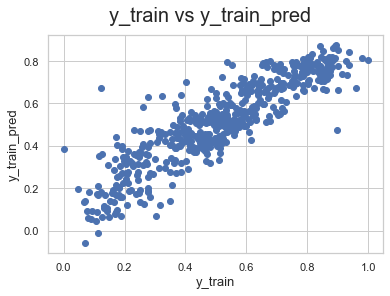

In [55]:
# Visualising predicted values with originals
fig = plt.figure()
fig.suptitle('y_train vs y_train_pred', fontsize = 20)
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('y_train_pred', fontsize = 13) 

In [56]:
R2_train_M1 = r2_score(y_train, y_train_pred)
R2_train_M1

0.7919207384041664

# 

## Verifying the assumptions of linear regression
### 1) Error terms are normally distributed with mean zero


<Figure size 2160x2160 with 0 Axes>

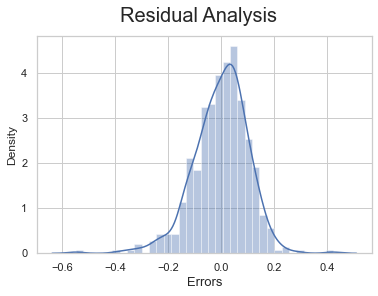

In [57]:
# Plot the histogram of the error terms
plt.figure(figsize = (30, 30))
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 35)
fig.suptitle('Residual Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 13)
plt.show()

### 2) Error terms are independent of each other and 
### 3)  Error terms have constant variance

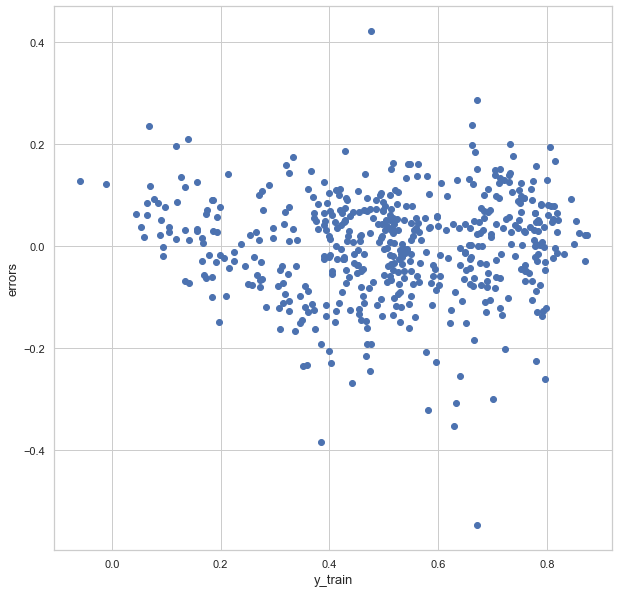

In [58]:
plt.figure(figsize=[10,10])
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('errors', fontsize = 13) 
plt.show()

In [59]:
# Getting the correlation between errors and y_pred
Corr_M1 = y_train_pred.corr(y_train - y_train_pred)
Corr_M1

4.873460671108003e-16

# 

# 6) Making Predictions (test data)

Removing the variables in test data which were removed in train data.

**Scaling the test data**

In [60]:
# Scaling numerical variables for test data
bbdtt_test[scol] = scaler.transform(bbdtt_test[scol])

**Splitting data to x and y test**

In [61]:
y_test = bbdtt_test.pop('cnt')
X_test = bbdtt_test

**Adding the constant to the X_test**

In [62]:
X_test_c = sm.add_constant(X_test)

**Dropping the variables from X_test_c**

In [63]:
col_remove = Lrfe_reject + ['hum','temp','mnth_jul','season_winter']
X_test_c = X_test_c.drop(col_remove, axis=1)
X_test_c

,const,yr,holiday,windspeed,season_spring,season_summer,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_cloudy,weathersit_lightrain
184,1.0,0,1,0.084219,0,0,0,0,0,0,1,0
535,1.0,1,0,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0.334206,0,0,0,0,0,0,1,0
221,1.0,0,0,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.537414,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.287411,1,0,0,0,0,0,1,0
702,1.0,1,0,0.283397,0,0,1,0,0,0,0,0
127,1.0,0,0,0.069510,0,1,0,0,0,0,0,0
640,1.0,1,0,0.052115,0,0,0,0,0,0,1,0


**Predicting the y values for test data**

In [64]:
y_test_pred = lm.predict(X_test_c)
y_test_pred

184    0.394586
535    0.761551
299    0.432318
221    0.519672
152    0.442650
         ...   
400    0.449664
702    0.659088
127    0.532025
640    0.731813
72     0.308473
Length: 219, dtype: float64

# 

# 7) Model Evaluation 

Text(0, 0.5, 'y_test_pred')

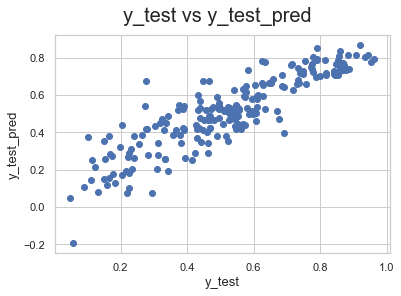

In [65]:
# Visualising predicted values with originals of test data
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 13)
plt.ylabel('y_test_pred', fontsize = 13)  

**Getting R-Square score for test**

In [66]:
R2_test_M1 = r2_score(y_test, y_test_pred)
R2_test_M1

0.7772012091843699

The R-Square for model built is 0.792.<br>
The R-Square for test is 0.778

# 

# MODEL - II

## => Building model with backward approach

In [67]:
# Defining a function to perform backward approach
def OLSmodel2(x_trn,y_trn,x,v,x_tst='',y_tst=''):
    
    for i in range(0,x+1):
        
        X_train_c = sm.add_constant(x_trn)
        lm = sm.OLS(y_trn, X_train_c).fit()
    
        Coeff_table = pd.DataFrame(lm.params[x_trn.columns])
        Coeff_table.rename(columns = {0:'coeff'}, inplace = True)
    
        Pval_table = pd.DataFrame(round(lm.pvalues[x_trn.columns],3))
        Pval_table.rename(columns = {0:'pval'}, inplace = True)
    
        Summary_table= pd.merge(Pval_table,Coeff_table,left_index=True,right_index=True)
        
        V=VIFvalues(x_trn)
    
        vt = pd.merge(Summary_table,V,left_index=True,right_on='Variables')
    
        vt = vt.sort_values(by = 'pval', ascending = False)
    
        global r
    
        if vt['pval'].iloc[0] >= 0.05:
            r = vt['Variables'].iloc[0]
            x_trn = x_trn.drop([str(r)], axis = 1)
        elif vt['pval'].iloc[0] < 0.05:
            vt = vt.sort_values(by = 'VIF', ascending = False)
            if vt['VIF'].iloc[0] >= 5:
                r = vt['Variables'].iloc[0]
                x_trn = x_trn.drop([str(r)], axis = 1)
            elif vt['VIF'].iloc[0] < 5:
                print('Iteration is stopped since saturation is reached at',i)
                break
                
    if v == 'VIF':
        return vt
    elif v == 'train_pred':
        y_pred = lm.predict(X_train_c)
        return y_pred
    elif v == 'train_error':
        y_pred = lm.predict(X_train_c)
        e = y_trn - y_pred
        return e
    elif v == 'summary':
        return lm.summary()
    
    x_tst_c = sm.add_constant(x_tst[x_trn.columns])
    if v == 'test_pred':
        y_pred = lm.predict(x_tst_c)
        return y_pred
    elif v == 'test_error':
        y_pred = lm.predict(x_tst_c)
        e = y_trn - y_pred
        return e

### Knowing where the model stops and knowing the p-values, VIF values

In [68]:
OLSmodel2(X_train, y_train,18,'VIF')

Iteration is stopped since saturation is reached at 15


,pval,coeff,Variables,VIF
2,0.000,-0.185321,windspeed,3.40
3,0.000,-0.238348,season_spring,2.36
0,0.000,0.245387,yr,1.75
4,0.001,-0.040242,season_summer,1.70
6,0.000,-0.120613,mnth_jan,1.63
9,0.000,-0.089501,weathersit_cloudy,1.47
7,0.000,-0.109862,mnth_nov,1.24
11,0.015,-0.031488,day_Mon,1.20
12,0.011,-0.033036,day_Tue,1.20
8,0.001,0.059160,mnth_sep,1.16


In [69]:
# Getting summary for model built
M2_summary = OLSmodel2(X_train, y_train,16,'summary')
M2_summary

Iteration is stopped since saturation is reached at 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.79e-162
Time:                        19:07:10   Log-Likelihood:                 444.24
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     496   BIC:                            -801.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5937      0.013     45.195      0.000       0.568       0.620
yr                       0.2454      0.009     26.842      0.000       0.227       0.263
holiday                 -0.0884      0.029     -3.006      0.003      -0.146      -0.031
windspeed               -0.1853      0.028     -6.550      0.000      -0.241      -0.130
season_spring           -0.2383      0.014    -16.509      0.000      -0.267      -0.210
season_summer           -0.0402      0.013     -3.193      0.001      -0.065      -0.015
mnth_dec                -0.1163      0.017     -6.742      0.000      -0.150      -0.082
mnth_jan                -0.1206      0.020     -6.155      0.000      -0.159      -0.082
mnth_nov                -0.1099      0.018     -6.172      0.000      -0.145      -0.075
mnth_sep                 0.0592      0.018      3.256      0.001       0.023       0.095
weathersit_cloudy       -0.0895      0.010     -9.194      0.000      -0.109      -0.070
weathersit_lightrain    -0.3186      0.027    -11.598      0.000      -0.373      -0.265
day_Mon                 -0.0315      0.013     -2.450      0.015      -0.057      -0.006
day_Tue                 -0.0330      0.013     -2.564      0.011      -0.058      -0.008
==============================================================================
Omnibus:                       61.531   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.477
Skew:                          -0.619   Prob(JB):                     2.86e-34
Kurtosis:                       5.395   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## => Performing residual Analysis

In [70]:
# Getting the predicted values for train data
y_train_pred = OLSmodel2(X_train,y_train,16,'train_pred')
y_train_pred

Iteration is stopped since saturation is reached at 15


653    0.783336
576    0.790028
426    0.463911
728    0.330099
482    0.674408
         ...   
526    0.610401
578    0.804399
53     0.334705
350    0.276422
79     0.365752
Length: 510, dtype: float64

Text(0, 0.5, 'y_train_pred')

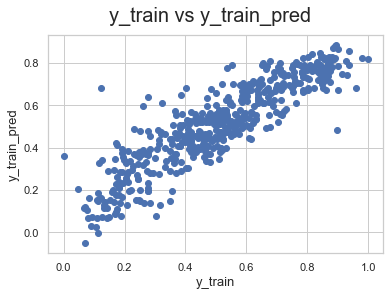

In [71]:
# Visualising predicted values with originals
fig = plt.figure()
fig.suptitle('y_train vs y_train_pred', fontsize = 20)
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('y_train_pred', fontsize = 13) 

In [72]:
R2_train_M2 = r2_score(y_train, y_train_pred)
R2_train_M2

0.7962948471365856

## => Verifying the assumptions of linear regression
### 1) Error terms are normally distributed with mean zero

<Figure size 2160x2160 with 0 Axes>

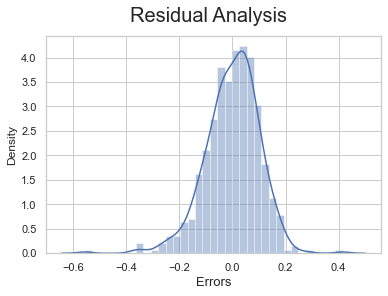

In [73]:
# Plot the histogram of the error terms
plt.figure(figsize = (30, 30))
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 35)
fig.suptitle('Residual Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 13)
plt.show()

### 2) Error terms are independent of each other and 
### 3)  Error terms have constant variance

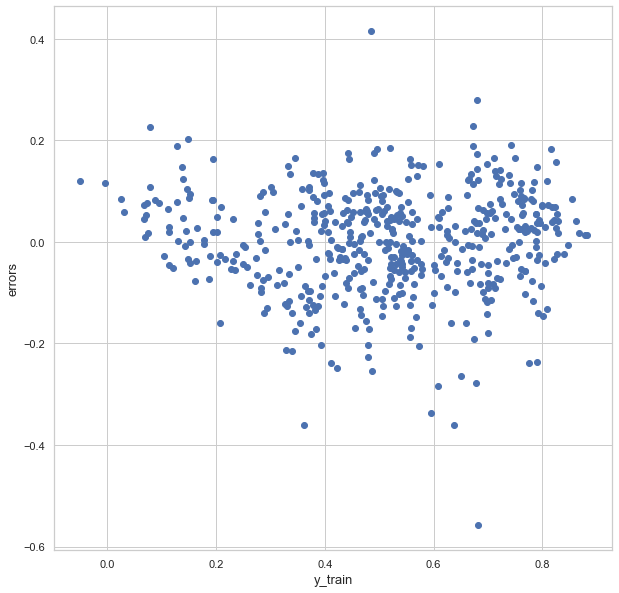

In [74]:
plt.figure(figsize=[10,10])
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('errors', fontsize = 13) 
plt.show()

In [75]:
# Getting the correlation between errors and y_pred
Corr_M2 = y_train_pred.corr(y_train - y_train_pred)
Corr_M2

-1.8788915483889916e-15

## => Making Predictions (test data)

In [76]:
# Getting the predicted values for the test data
y_test_pred = OLSmodel2(X_train,y_train,16,'test_pred',X_test,y_test)
y_test_pred

Iteration is stopped since saturation is reached at 15


184    0.400234
535    0.770348
299    0.442257
221    0.530764
152    0.453857
         ...   
400    0.424932
702    0.670302
127    0.507533
640    0.739921
72     0.317648
Length: 219, dtype: float64

Text(0, 0.5, 'y_test_pred')

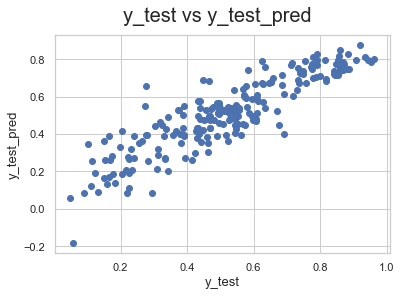

In [77]:
# Visualising predicted values with originals of test data
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 13)
plt.ylabel('y_test_pred', fontsize = 13)  

**Getting R-Square score for test**

In [78]:
R2_test_M2 = r2_score(y_test, y_test_pred)
R2_test_M2

0.7868995184744216

# 

# MODEL - III

***Adding temperature again since i found it more correlative in pairplot***

In [79]:
# Getting list of all varibles after performing model 2.
l3 = list(OLSmodel2(X_train, y_train,18,'VIF')['Variables'])
l3

Iteration is stopped since saturation is reached at 15


['windspeed',
 'season_spring',
 'yr',
 'season_summer',
 'mnth_jan',
 'weathersit_cloudy',
 'mnth_nov',
 'day_Mon',
 'day_Tue',
 'mnth_sep',
 'mnth_dec',
 'weathersit_lightrain',
 'holiday']

In [80]:
# Adding temp and agin performing the backward approach.
l3.append('temp')
print(l3)
X_train_new3 = X_train[l3]
M3_summary = OLSmodel2(X_train_new3, y_train,18,'summary')
M3_summary

['windspeed', 'season_spring', 'yr', 'season_summer', 'mnth_jan', 'weathersit_cloudy', 'mnth_nov', 'day_Mon', 'day_Tue', 'mnth_sep', 'mnth_dec', 'weathersit_lightrain', 'holiday', 'temp']
Iteration is stopped since saturation is reached at 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.90e-183
Time:                        19:07:16   Log-Likelihood:                 488.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     498   BIC:                            -903.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3458      0.019     18.083      0.000       0.308       0.383
windspeed               -0.1533      0.025     -6.014      0.000      -0.203      -0.103
season_spring           -0.1358      0.013    -10.107      0.000      -0.162      -0.109
yr                       0.2373      0.008     28.266      0.000       0.221       0.254
mnth_jan                -0.0568      0.018     -3.157      0.002      -0.092      -0.021
weathersit_cloudy       -0.0794      0.009     -8.886      0.000      -0.097      -0.062
day_Mon                 -0.0280      0.012     -2.382      0.018      -0.051      -0.005
day_Tue                 -0.0300      0.012     -2.550      0.011      -0.053      -0.007
mnth_sep                 0.0690      0.016      4.367      0.000       0.038       0.100
weathersit_lightrain    -0.2853      0.025    -11.340      0.000      -0.335      -0.236
holiday                 -0.0928      0.027     -3.489      0.001      -0.145      -0.041
temp                     0.3275      0.024     13.470      0.000       0.280       0.375
==============================================================================
Omnibus:                       52.127   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.658
Skew:                          -0.573   Prob(JB):                     3.44e-25
Kurtosis:                       4.997   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## => Performing residual Analysis

In [81]:
# Getting the predicted values for train data
y_train_pred = OLSmodel2(X_train_new3,y_train,16,'train_pred')
y_train_pred

Iteration is stopped since saturation is reached at 3


653    0.703910
576    0.809419
426    0.473554
728    0.397887
482    0.604298
         ...   
526    0.689084
578    0.837288
53     0.259265
350    0.253473
79     0.336644
Length: 510, dtype: float64

Text(0, 0.5, 'y_train_pred')

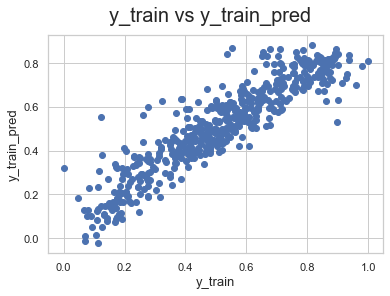

In [82]:
# Visualising predicted values with originals
fig = plt.figure()
fig.suptitle('y_train vs y_train_pred', fontsize = 20)
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('y_train_pred', fontsize = 13) 

In [83]:
R2_train_M3 = r2_score(y_train, y_train_pred)
R2_train_M3

0.8290741393898007

## => Verifying the assumptions of linear regression
### 1) Error terms are normally distributed with mean zero

<Figure size 2160x2160 with 0 Axes>

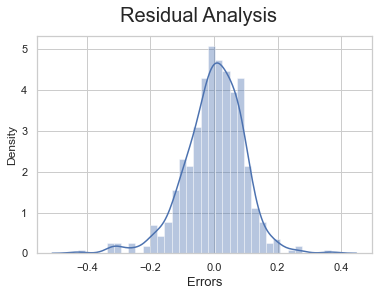

In [84]:
# Plot the histogram of the error terms
plt.figure(figsize = (30, 30))
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 35)
fig.suptitle('Residual Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 13)
plt.show()

### 2) Error terms are independent of each other and 
### 3)  Error terms have constant variance

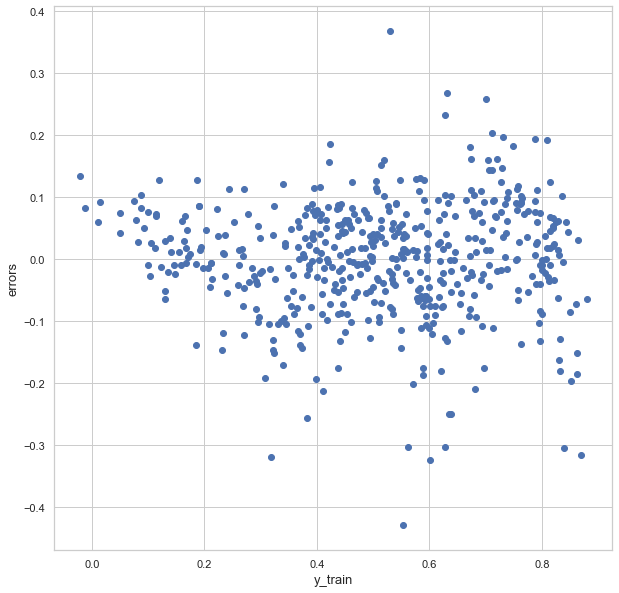

In [85]:
plt.figure(figsize=[10,10])
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('errors', fontsize = 13) 
plt.show()

In [86]:
# Getting the correlation between errors and y_pred
Corr_M3 = y_train_pred.corr(y_train - y_train_pred)
Corr_M3

-2.478288472056708e-15

## => Making Predictions (test data)

In [87]:
y_test_pred = OLSmodel2(X_train_new3,y_train,16,'test_pred',X_test,y_test)
y_test_pred

Iteration is stopped since saturation is reached at 3


184    0.433000
535    0.854652
299    0.382784
221    0.582443
152    0.531032
         ...   
400    0.378074
702    0.709637
127    0.496551
640    0.739797
72     0.287381
Length: 219, dtype: float64

Text(0, 0.5, 'y_test_pred')

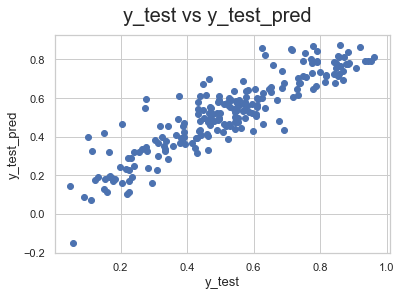

In [88]:
# Visualising predicted values with originals of test data
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 13)
plt.ylabel('y_test_pred', fontsize = 13)  

**Getting R-Square score for test**

In [89]:
R2_test_M3 = r2_score(y_test, y_test_pred)
R2_test_M3

0.8016029185047697

# Comparing the models

### Comparing R-square score for predicted train vs actual train

In [90]:
print('R-square score for predicted train vs actual train for MODEL-I:',R2_train_M1)
print('R-square score for predicted train vs actual train for MODEL-II:',R2_train_M2)
print('R-square score for predicted train vs actual train for MODEL-III:',R2_train_M3)

R-square score for predicted train vs actual train for MODEL-I: 0.7919207384041664
R-square score for predicted train vs actual train for MODEL-II: 0.7962948471365856
R-square score for predicted train vs actual train for MODEL-III: 0.8290741393898007


Model 3 has high R-square score

### Comparing correlation between predicted train vs error

In [91]:
print('correlation between predicted train vs error for MODEL-I:',Corr_M1)
print('correlation between predicted train vs error for MODEL-II:',Corr_M2)
print('correlation between predicted train vs error for MODEL-III:',Corr_M3)

correlation between predicted train vs error for MODEL-I: 4.873460671108003e-16
correlation between predicted train vs error for MODEL-II: -1.8788915483889916e-15
correlation between predicted train vs error for MODEL-III: -2.478288472056708e-15


All models have 0 correlation

### Comparing R-square score for test vs error

In [92]:
print('R-square score for test vs error for MODEL-I:',R2_test_M1)
print('R-square score for test vs error for MODEL-II:',R2_test_M2)
print('R-square score for test vs error for MODEL-III:',R2_test_M3)

R-square score for test vs error for MODEL-I: 0.7772012091843699
R-square score for test vs error for MODEL-II: 0.7868995184744216
R-square score for test vs error for MODEL-III: 0.8016029185047697


Model 3 has high R-square score

### Comparing graphs for all the models

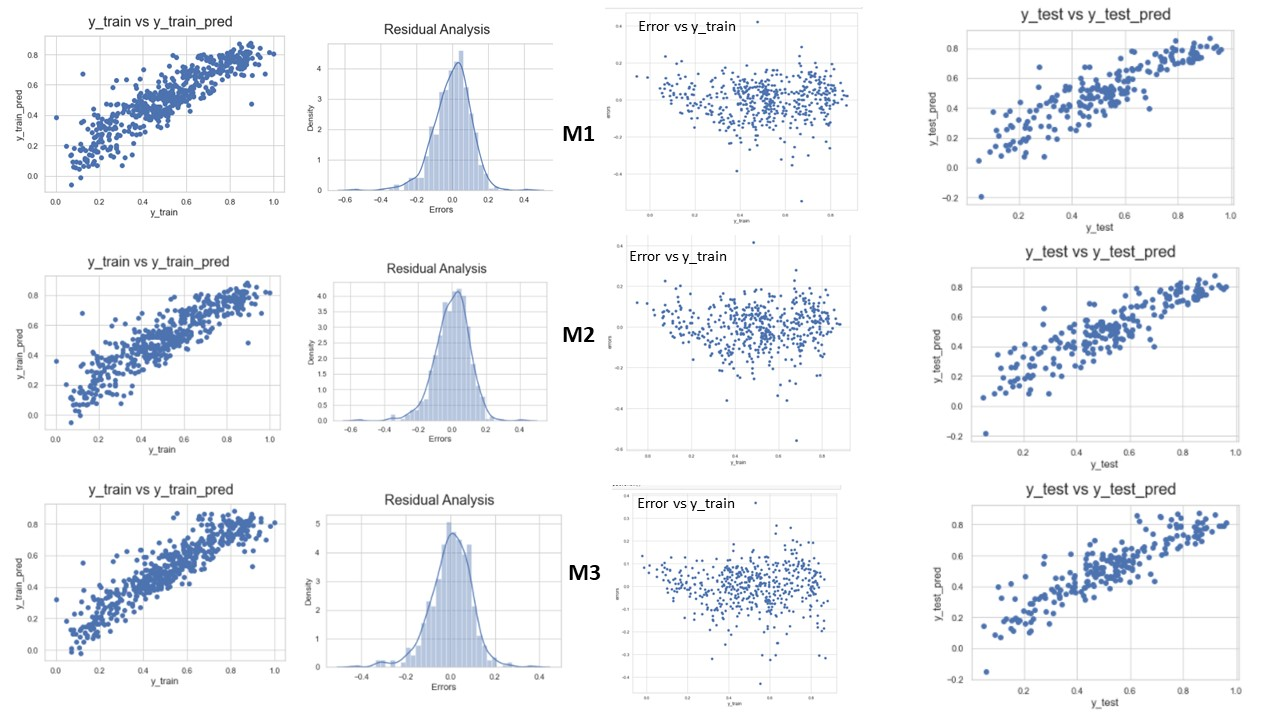

### Comparing the summaries

In [93]:
print('Summary of MODEL-I:',M1_summary)
print('Summary of MODEL-II:',M2_summary)
print('Summary of MODEL-III:',M3_summary)

Summary of MODEL-I:                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.42e-162
Time:                        19:07:04   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

R-squared, Adj. R-squared and F-statistic values are high for model 3.

# Selecting the best model

### MODEL-III is selected as best one

Final model is:

$ cnt = 
+ 0.3458 \times const 
+ 0.3275 \times temp 
+ 0.2373 \times yr 
+ 0.069	 \times mnth\underline{ }sep 
- 0.028  \times day\underline{ }Mon
- 0.03   \times day\underline{ }Tue
- 0.0568 \times mnth\underline{ }jan 
- 0.0794 \times weathersit\underline{ }cloudy 
- 0.0928 \times holiday 
- 0.1358 \times season\underline{ }spring 
- 0.1533 \times windspeed
- 0.2853 \times weathersit\underline{ }lightrain $

# 